In [101]:
import xarray as xr
import h5py
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def process_ifgram_stack(file_path):
    """
    Process an ifgramStack.h5 file into an xarray Dataset, renaming dimensions,
    converting the first column of 'date' to datetime objects, and assigning
    Date, latitude, and longitude coordinates.
    
    Parameters:
    -----------
    file_path : str
        Path to the ifgramStack.h5 file.
        
    Returns:
    --------
    ds : xarray.Dataset
        Processed dataset with renamed dimensions and assigned coordinates.
    """
    def coord_range(df, coord):
        """
        Compute coordinate range for latitude or longitude based on dataset metadata.
        
        Parameters:
        -----------
        df : xarray.Dataset
            Dataset containing metadata attributes (X_FIRST, X_STEP, Y_FIRST, Y_STEP, WIDTH, LENGTH).
        coord : str
            Coordinate type ('lat', 'latitude', 'lon', or 'longitude').
            
        Returns:
        --------
        numpy.ndarray
            Array of coordinate values.
        """
        if coord == 'lat' or coord == 'latitude':
            latrange = np.linspace(
                float(df.attrs['Y_FIRST']),
                float(df.attrs['Y_FIRST']) + float(df.attrs['Y_STEP']) * float(df.attrs['LENGTH']),
                int(df.attrs['LENGTH'])
            )
            return latrange
        elif coord == 'lon' or coord == 'longitude':
            lonrange = np.linspace(
                float(df.attrs['X_FIRST']),
                float(df.attrs['X_FIRST']) + float(df.attrs['X_STEP']) * float(df.attrs['WIDTH']),
                int(df.attrs['WIDTH'])
            )
            return lonrange
        else:
            raise ValueError("coord must be 'lat', 'latitude', 'lon', or 'longitude'")

    # Open the dataset
    ds = xr.open_dataset(file_path, engine='h5netcdf', phony_dims='sort', decode_coords="all")

    # Rename dimensions
    ds = ds.rename_dims({
        'phony_dim_0': 'Date',
        'phony_dim_1': 'latitude',
        'phony_dim_2': 'longitude'
    })

    # Extract the first column of the 'date' variable
    first_date = ds['date'].values[:, 0]
    last_date = ds['date'].values[:, 1]

    # Convert byte strings to datetime objects
    date_t1 = [datetime.strptime(date.decode('utf-8'), '%Y%m%d') for date in first_date]
    date_t2 = [datetime.strptime(date.decode('utf-8'), '%Y%m%d') for date in last_date]

    # Assign coordinates
    ds = ds.assign_coords({
        'Date': ('Date', np.array(date_t1)),
        'latitude': ('latitude', coord_range(ds, 'latitude')),
        'longitude': ('longitude', coord_range(ds, 'longitude'))
    })

    return ds,date_t1,date_t2

# df_ifgramStack,t1,t2 = process_ifgram_stack(file_path)
# df_ifgramStack.to_netcdf('ifgramStack_processed.nc')

In [102]:
# Example usage
file_path = '/home/jovyan/humla_descending_5by1_2022_2024_mjjason/MintPy/inputs/ifgramStack.h5'
df_ifgramStack,t1,t2 = process_ifgram_stack(file_path)

# Print the dataset to verify
print(df_ifgramStack)

<xarray.Dataset> Size: 9GB
Dimensions:           (Date: 113, latitude: 1667, longitude: 4729,
                       phony_dim_3: 2)
Coordinates:
  * Date              (Date) datetime64[ns] 904B 2022-05-03 ... 2024-11-12
  * latitude          (latitude) float64 13kB 30.4 30.4 30.4 ... 30.06 30.06
  * longitude         (longitude) float64 38kB 81.61 81.61 81.61 ... 82.58 82.58
Dimensions without coordinates: phony_dim_3
Data variables:
    bperp             (Date) float32 452B ...
    coherence         (Date, latitude, longitude) float32 4GB ...
    connectComponent  (Date, latitude, longitude) int16 2GB ...
    date              (Date, phony_dim_3) |S8 2kB b'20220503' ... b'20241124'
    dropIfgram        (Date) bool 113B ...
    unwrapPhase       (Date, latitude, longitude) float32 4GB ...
Attributes: (12/58)
    ALOOKS:                     1
    ANTENNA_SIDE:               -1
    AZIMUTH_PIXEL_SIZE:         14.1
    BANDS:                      1
    CENTER_LINE_UTC:            1650.0

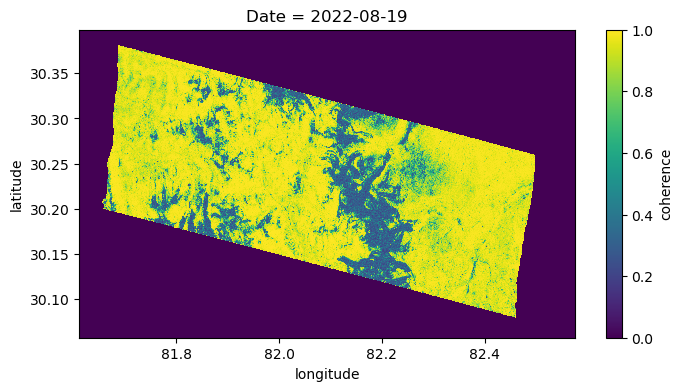

In [103]:
df_ifgramStack.isel(Date=20).coherence.plot.imshow( cmap='viridis',figsize=(8, 4))

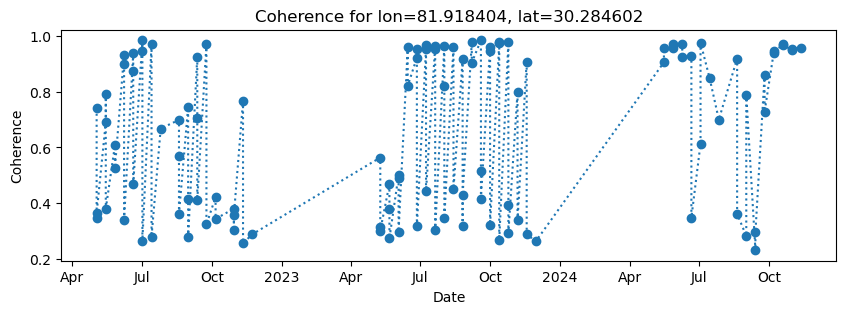

In [116]:
import matplotlib.pyplot as plt

lon_value = 81.918404
lat_value = 30.284602

plt.figure(figsize=(10, 3))
subset['coherence'].plot(marker='o', linestyle=':')  # Dotted line
plt.title(f'Coherence for lon={lon_value}, lat={lat_value}')
plt.xlabel('Date')
plt.ylabel('Coherence')
plt.show()

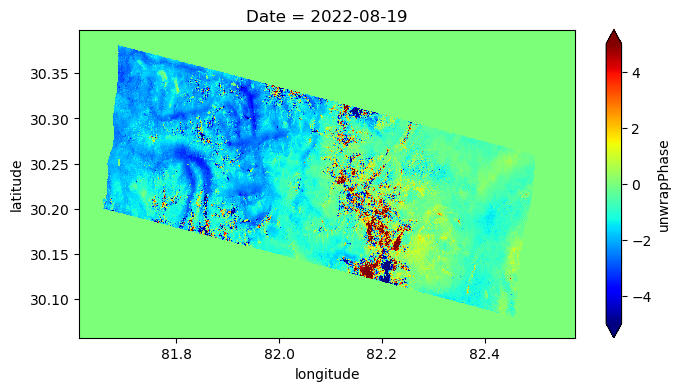

In [108]:
df_ifgramStack.isel(Date=20).unwrapPhase.plot.imshow( cmap='jet',figsize=(8, 4),vmin=-5,vmax=5)

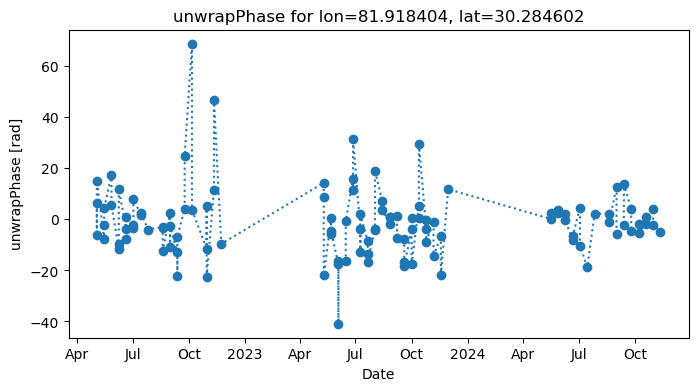

In [119]:
lon_value = 81.918404
lat_value = 30.284602

plt.figure(figsize=(8, 4))
subset['unwrapPhase'].plot(marker='o', linestyle=':')
plt.title(f'unwrapPhase for lon={lon_value}, lat={lat_value}')
plt.xlabel('Date')
plt.ylabel('unwrapPhase [rad]')
plt.show()

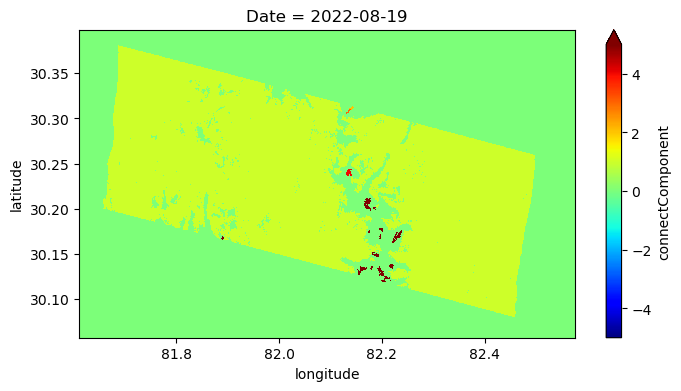

In [110]:
df_ifgramStack.isel(Date=20).connectComponent.plot.imshow( cmap='jet',figsize=(8, 4),vmin=-5,vmax=5)